In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import netCDF4

In [4]:
import glob

In [15]:
import kid_readout.analysis.resources.skip5x4

In [70]:
beamncs = glob.glob('/data/readout/beams/2015-06-2*.nc')
beamncs.sort()
len(beamncs)

13

In [71]:
beamncs[3]

'/data/readout/beams/2015-06-22_201210.nc'

In [64]:
!ls -lhtr /data/readout/beams/2015-06-22_200648.nc

-rwxrwxr-x. 1 readout readout 1.1M Jun 22 20:11 /data/readout/beams/2015-06-22_200648.nc


In [69]:
!rm /data/readout/beams/2015-06-22_200648.nc

In [6]:
def get_beamnc(fn):
    nc = netCDF4.Dataset(fn)
    mapg = nc.groups[nc.groups.keys()[0]]
    z = mapg.variables['z'][:]
    x = mapg.variables['x'][:]
    y = mapg.variables['y'][:]
    freq = mapg.variables['frequency'][:]
    nc.close()
    return x,y,z,freq

In [121]:
for fn in beamncs:
    x,y,z,freq = get_beamnc(fn)
    print fn," | ", z.shape, " | ",x.min()," | ",x.max()," | ",y.min()," | ",y.max()," | ",x[1]-x[0]," | ",y[1]-y[0]

/data/readout/beams/2015-06-22_022110.nc  |  (11, 21, 1)  |  3000.0  |  5000.0  |  3000.0  |  7000.0  |  200.0  |  200.0
/data/readout/beams/2015-06-22_023501.nc  |  (61, 81, 1)  |  2500.0  |  5500.0  |  1000.0  |  9000.0  |  50.0  |  100.0
/data/readout/beams/2015-06-22_170046.nc  |  (41, 41, 1)  |  0.0  |  8000.0  |  0.0  |  8000.0  |  200.0  |  200.0
/data/readout/beams/2015-06-22_201210.nc  |  (251, 276, 1)  |  1000.0  |  6000.0  |  2000.0  |  7500.0  |  20.0  |  20.0
/data/readout/beams/2015-06-23_154352.nc  |  (14, 14, 3)  |  1000.0  |  7500.0  |  1000.0  |  7500.0  |  500.0  |  500.0
/data/readout/beams/2015-06-23_164510.nc  |  (169, 215, 4)  |  1100.0  |  7820.0  |  80.0  |  8640.0  |  40.0  |  40.0
/data/readout/beams/2015-06-23_164958.nc  |  (169, 215, 4)  |  1100.0  |  7820.0  |  80.0  |  8640.0  |  40.0  |  40.0
/data/readout/beams/2015-06-23_165122.nc  |  (97, 108, 4)  |  1100.0  |  8780.0  |  80.0  |  8640.0  |  80.0  |  80.0
/data/readout/beams/2015-06-24_161053_3_3_turn

In [122]:
x,y,z,freq = get_beamnc('/data/readout/beams/2015-06-23_165122.nc')

In [127]:
x,y,z2,freq = get_beamnc('/data/readout/beams/2015-06-24_161053_3_3_turns.nc')

In [144]:
x3,y3,z3,freq = get_beamnc('/data/readout/beams/2015-06-25_114727_3_3_turns.nc')

In [123]:
x.shape,y.shape,z.shape

((97,), (108,), (97, 108, 4))

<matplotlib.contour.QuadContourSet instance at 0x5fed0e0>

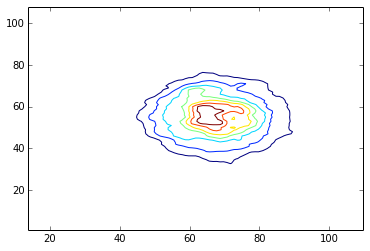

In [124]:
contour(x/80.,y/80.,z[:,:,0].T)

<matplotlib.colorbar.Colorbar instance at 0xf95e758>

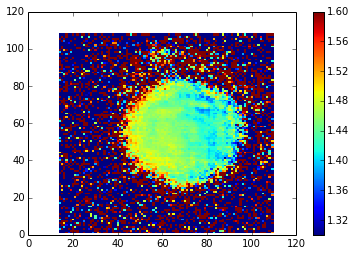

In [196]:
pcolormesh(x/80.,y/80.,(z[:,:,0].T/z2[:,:,0].T))
clim(1.3,1.6)
colorbar()


In [148]:
import scipy.interpolate

In [180]:
z3i = scipy.interpolate.interp2d(x3,y3,z3[:,:,1].T)

In [169]:
scipy.interpolate.interp2d?

<matplotlib.colorbar.Colorbar instance at 0xd987c68>

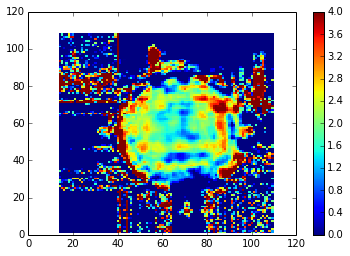

In [187]:
pcolormesh(x/80.,y/80.,10*np.log10(z[:,:,1].T/z3i(x,y)))
clim(0,4)
colorbar()

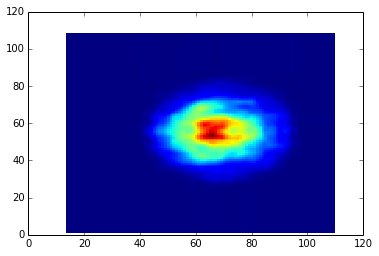

In [167]:
pcolormesh(x/80.,y/80.,z3i(x,y))

In [210]:
import kid_readout.analysis.process_mmw_response

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [235]:
mmrs = [kid_readout.analysis.process_mmw_response.MmwResponse('/data/readout/2015-04-23_115903_mmw_frequency_sweep.nc',k) for
        k in range(16)]

In [220]:
mmr.mmw_atten_turns

array([ 7.,  7.])

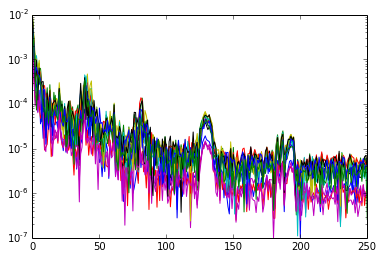

In [239]:
for mmr in mmrs:
    semilogy(np.abs(np.fft.rfft(mmr.mmw_frac_response)))
#semilogy(np.abs(np.fft.rfft(z[2,3,:])))

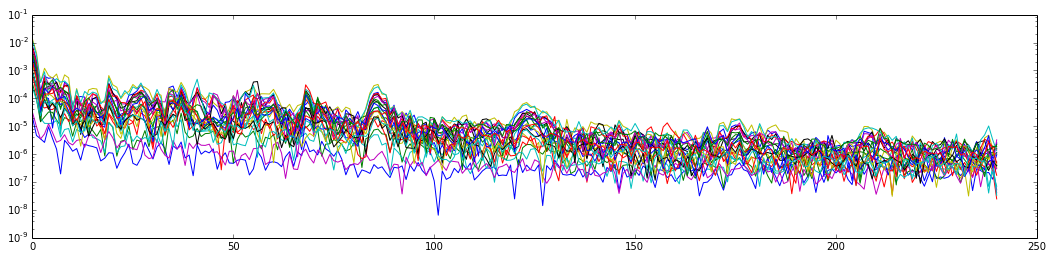

In [240]:
fig,ax2 = subplots(1,1,figsize=(18,4))
for xk in range(5):
    for yk in range(5):
        ax2.semilogy(np.abs(np.fft.rfft(z[xk,yk,:])))

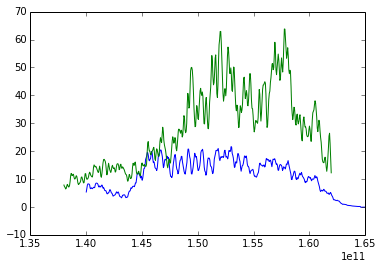

In [263]:
mmr = mmrs[15]
plot(mmr.mmw_freq,mmr.mmw_frac_response*1e6)
plot(freq,z[2,2,:]*1e6)

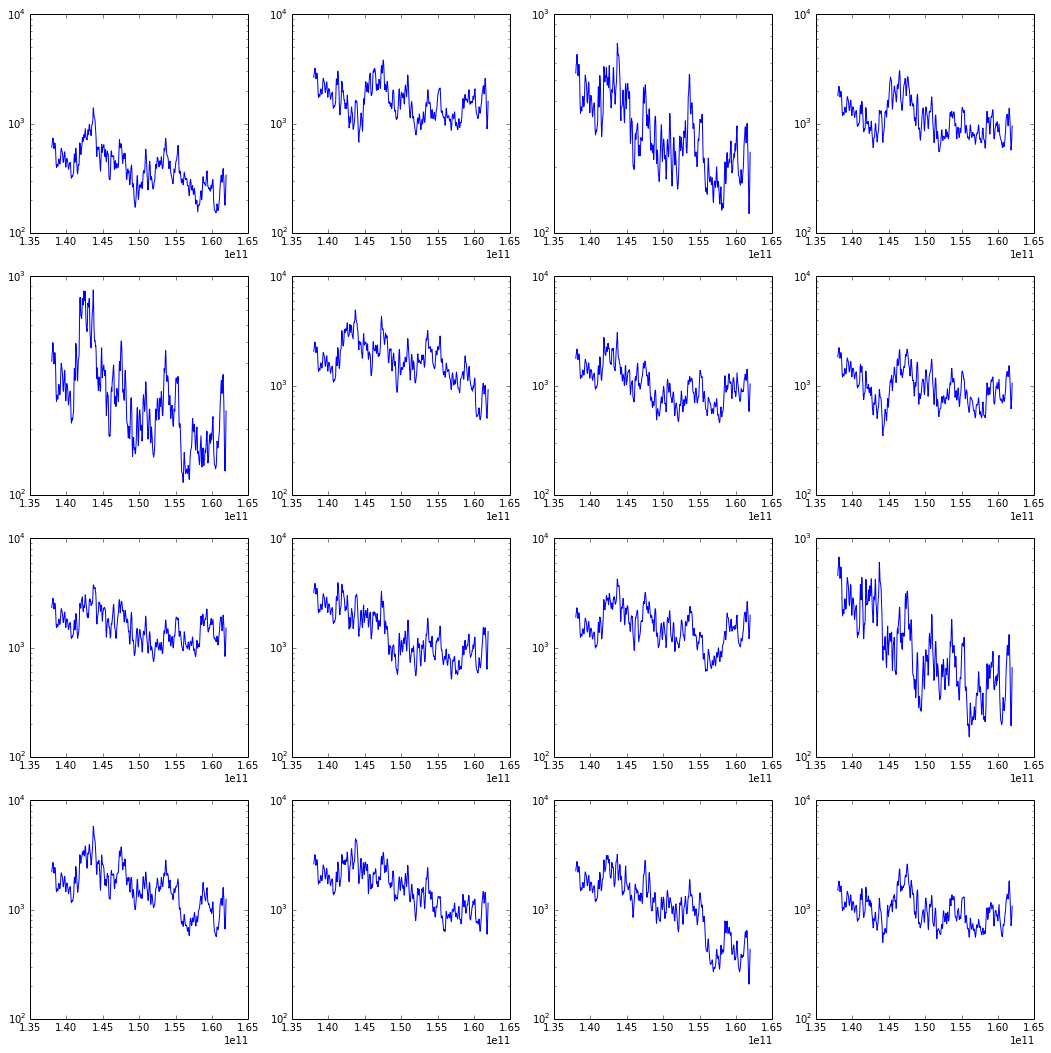

In [259]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    mmr = mmrs[k]
    
    #ratio = np.interp(freq,mmr.mmw_freq-1e9,mmr.mmw_frac_response)/(z[2,3,:]/2200.)
    #ax.semilogy(freq,ratio)
    ratio = np.interp(freq,mmr.mmw_freq+1e9,mmr.mmw_frac_response)/(z[2,2,:]/2200.)
    ax.semilogy(freq,ratio)

In [ ]:
    ratio = np.interp(freq,mmr.mmw_freq+1e9,mmr.mmw_frac_response)/(z[2,2,:]/2200.)
    ax.semilogy(freq,ratio)

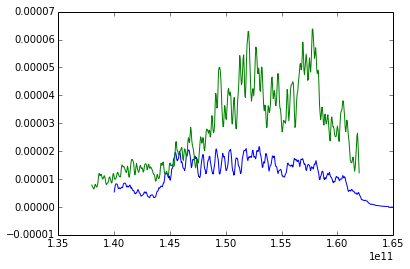

In [262]:
plot(mmr.mmw_freq,mmr.mmw_frac_response)
plot(freq,z[2,2,:])

In [197]:
x,y,z,freq = get_beamnc('/data/readout/beams/2015-06-25_035859_3_3_turns.nc')

(0.01, 1)

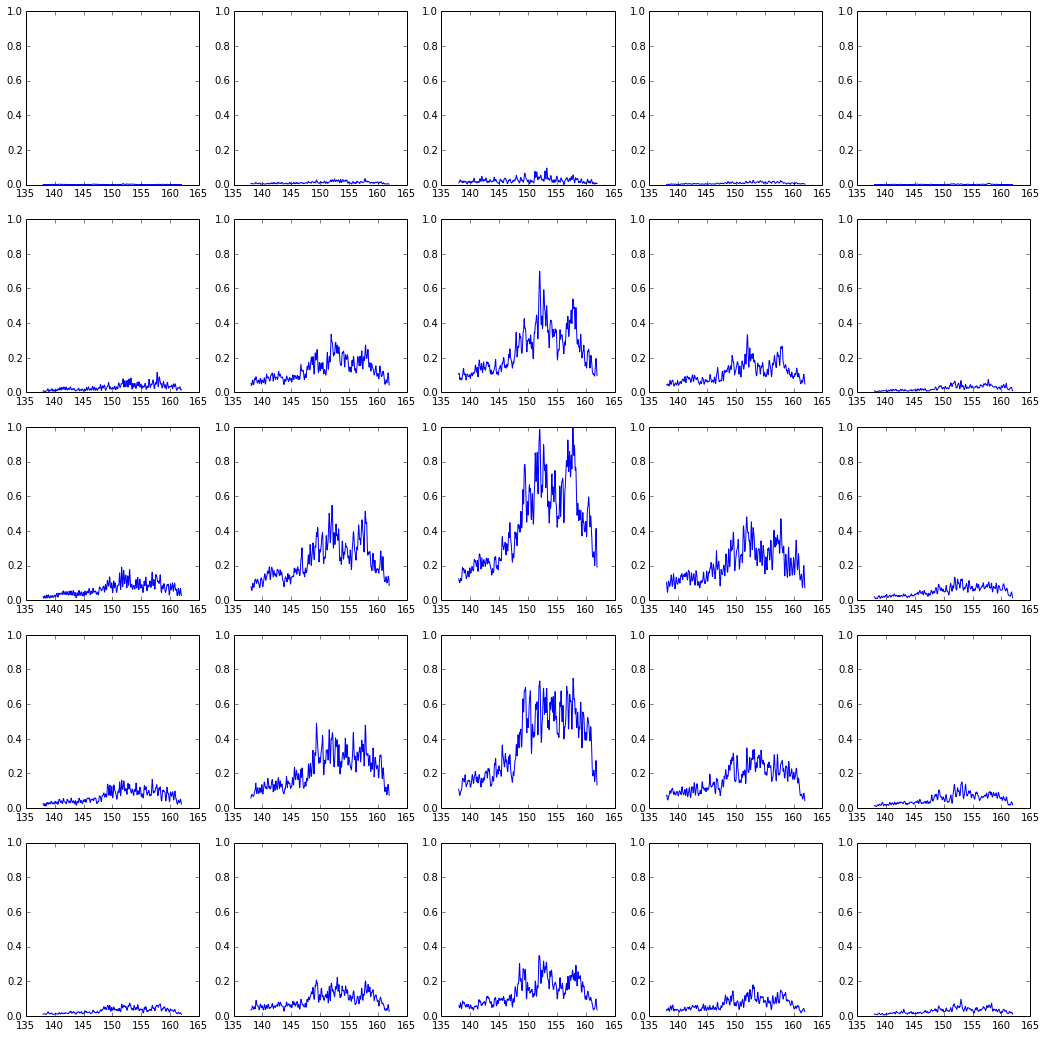

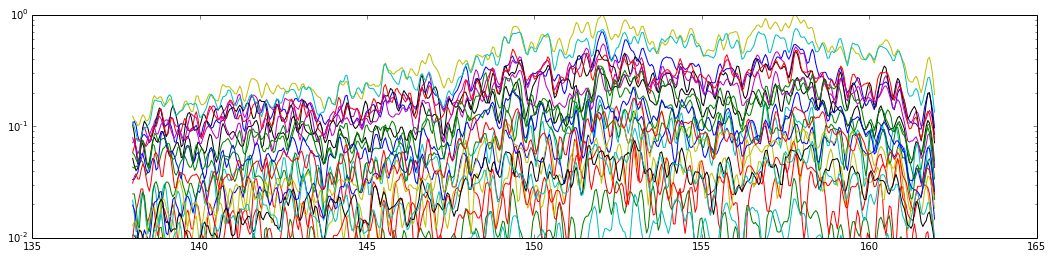

In [209]:
fig,axs = subplots(5,5,figsize=(18,18))
fig,ax2 = subplots(1,1,figsize=(18,4))
for xk in range(5):
    for yk in range(5):
        axs[xk,yk].plot(freq/1e9,(z[xk,yk,:]/z.max()))
        axs[xk,yk].set_ylim(0,1)
        ax2.semilogy(freq/1e9,(z[xk,yk,:]/z.max()))
ax2.set_ylim(1e-2,1)

In [105]:
def plot_power(x,y,Pr,extent=[-50,50,-50,50], xoffset=6.0, yoffset=0.0,normalize=True,mindB=-20):
    figure(figsize=(12,12))
    dB = 10*np.log10(np.abs(Pr))
    maxdB = dB.max()
    if normalize:
        dB = dB-maxdB
        maxdB=0
    CS = contour(x,y,dB,levels=np.linspace(maxdB-10,maxdB,11),cmap=cm.hsv)
    clabel(CS,[maxdB-3,maxdB-6,maxdB-9],colors='m',fmt='%.1f dB')
    #imshow(dB,extent=extent,cmap=cm.cubehelix,vmax=maxdB,vmin=maxdB+mindB, interpolation='none',origin='lower')
    pcolormesh(x,y,dB,cmap=cm.cubehelix,vmax=maxdB,vmin=maxdB+mindB)
    ax = gca()
    hole = Circle((0,0),radius=65./2,fill=False,lw=2,edgecolor='r',axes=ax,transform=ax.transData)
    ax.add_artist(hole)
    for k in range(20):
        rawx,rawy = kid_readout.analysis.resources.skip5x4.coordinate_array[k,:]
        x = (rawx - 2)*4.6 +xoffset
        y = (rawy - 2)*4.8 +yoffset
        #x,y = y,x
        horn = Circle((x,y),radius=4.8/2,fill=False,lw=2,edgecolor='b',axes=ax,transform=ax.transData)
        ax.add_artist(horn)
    #draw()
#    xlim(-30,30)
#    ylim(-30,30)
    cb = colorbar()
    cb.set_label('dB')
    cb.add_lines(CS)
    ax.set_ylabel('mm')
    ax.set_xlabel('mm')
    ax.plot([0],[0],'kx',mew=2)
    fig = gcf()
    return fig

(-60.0, 60.0, -60.0, 60.0)

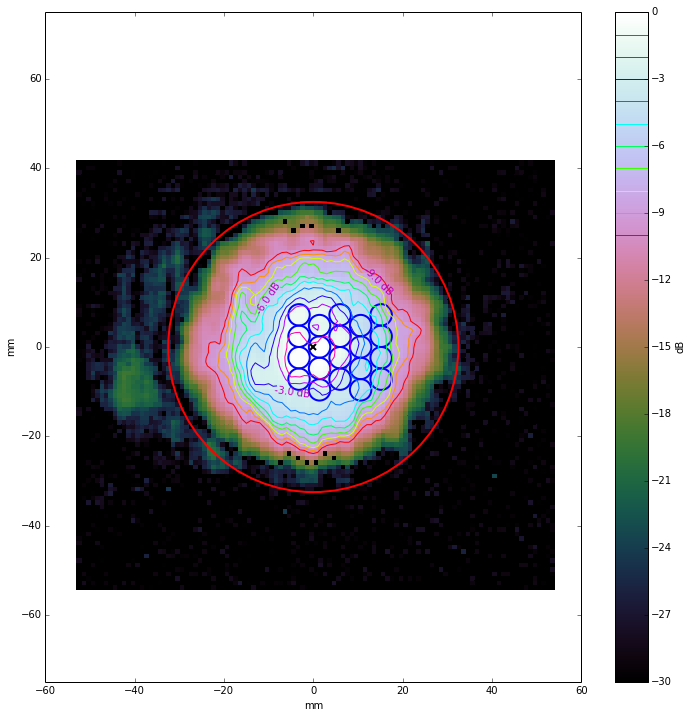

In [126]:
blah = plot_power(-(y/80.-55),(x/80.-68),z[:,:,0],mindB=-30)
#xlim(-60,60)
axis('equal')
#ylim(-60,60)

In [ ]:
def plot_beamnc(fn,extent=[-50,50,-50,50],xoffset=0,yoffset=0,normalize=True,mindB=-20):
    nc = netCDF4.Dataset(fn)
    mapg = nc.groups[nc.groups.keys()[0]]
    Pr = mapg.variables['z']
    figure(figsize=(12,12))
    dB = 10*np.log10(np.abs(Pr))
    maxdB = dB.max()
    if normalize:
        dB = dB-maxdB
        maxdB=0
    CS = contour(dB,extent=extent,levels=np.linspace(maxdB-10,maxdB,11),cmap=cm.hsv)
    clabel(CS,[maxdB-3,maxdB-6,maxdB-9],colors='m',fmt='%.1f dB')
    imshow(dB,extent=extent,cmap=cm.cubehelix,vmax=maxdB,vmin=maxdB+mindB, interpolation='none',origin='lower')
    ax = gca()
    hole = Circle((0,0),radius=65./2,fill=False,lw=2,edgecolor='r',axes=ax,transform=ax.transData)
    ax.add_artist(hole)
    for k in range(20):
        rawx,rawy = kid_readout.analysis.resources.skip5x4.coordinate_array[k,:]
        x = (rawx - 2)*4.6 +xoffset
        y = (rawy - 2)*4.8 +yoffset
        #x,y = y,x
        horn = Circle((x,y),radius=4.8/2,fill=False,lw=2,edgecolor='b',axes=ax,transform=ax.transData)
        ax.add_artist(horn)
    #draw()
#    xlim(-30,30)
#    ylim(-30,30)
    cb = colorbar()
    cb.set_label('dB')
    cb.add_lines(CS)
    ax.set_ylabel('mm')
    ax.set_xlabel('mm')
    ax.plot([0],[0],'kx',mew=2)
    fig = gcf()
    return fig